Install libraries.

In [ ]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 27.1 MB/s eta 0:00:00


In [ ]:
!pip install torch

In [ ]:
!pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [ ]:
!pip install tensorflow

Import libraries

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import tensorflow as tf
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

from pathlib import Path
import sys

import os
import numpy as np
import torch
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from transformers import AutoProcessor, CLIPVisionModelWithProjection
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

Use pytube to download youtube videos

In [ ]:
from pytube import YouTube
yt = YouTube('https://www.youtube.com/watch?v=B596ZYPIZiU')

In [ ]:
yt.streams.filter(file_extension='mp4')

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="134" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.4d401e" progressive="False" type="video">, <Stream: itag="133" mime_type="video/mp4" res="240p" fps="30fps" vcodec="avc1.4d4015" progressive="False" type="video">, <Stream: itag="160" mime_type="video/mp4" res="144p" fps="30fps" vcodec="avc1.4d400c" progressive="False" type="video

In [ ]:
stream = yt.streams.get_by_itag(22)

In [ ]:
stream.download()

'/content/Power Smash by Lee Zii Jia  DENMARK OPEN 2022  Power Badminton.mp4'

Capture frames from timeframe in the video

In [ ]:
num = 0
vidcap = cv2.VideoCapture('vid2.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        global num
        cv2.imwrite("47-" + str(num)+".jpeg", image)
        num = num + 1
    return hasFrames
sec = 386.9
frameRate = 0.1
success = getFrame(sec)
while (sec <= 387.9):
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

Check frames to see the endpoints of the timeframe

In [ ]:
vidcap = cv2.VideoCapture('vid2.mp4')
vidcap.set(cv2.CAP_PROP_POS_MSEC, 387800)
hasFrames,image = vidcap.read()
if hasFrames:
    cv2.imwrite("test.jpeg", image)

Pose estimation demo on any image_files

1080 1920
Nose coordinates: (958.3003807067871, 437.4801778793335)


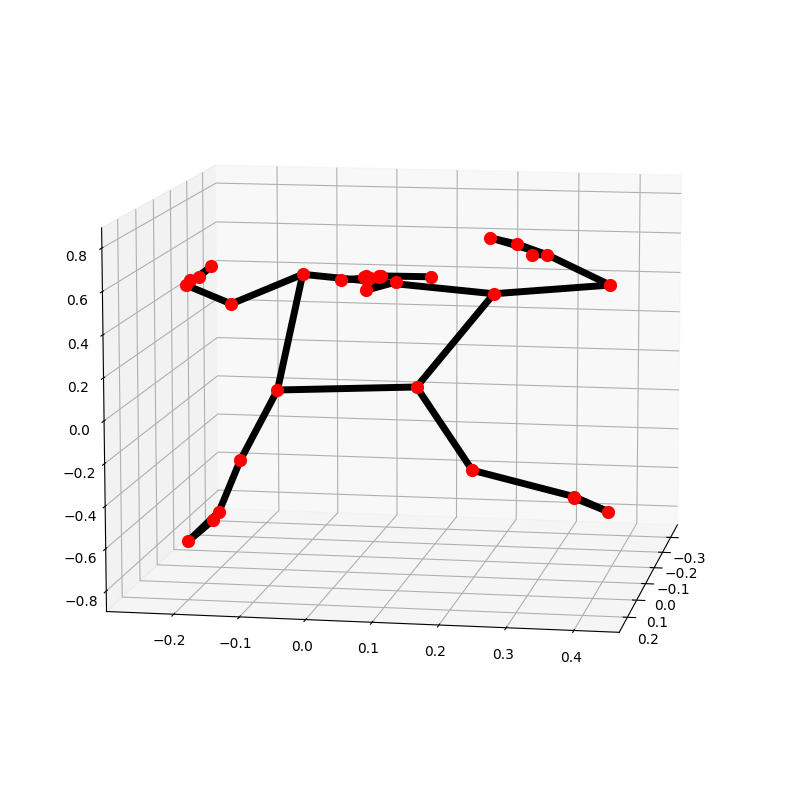

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

IMAGE_FILES = ["1-1.jpeg"]
BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    cv2.imwrite("Cropped Image.jpeg", image)
    image_height, image_width, _ = image.shape
    print(image_height, image_width)
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_height})'
    )
    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('annotate.jpeg', annotated_image)
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Collect pose estimation coordinates

In [ ]:
pose_estimation_cords = np.zeros((46, 23, 16, 3))

In [ ]:
import os
import os.path

mp_drawing = mp.solutions.drawing_utils
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

for num in range(1, 47):
  for num2 in range(23):
    IMAGE_FILES = ["drive/MyDrive/BadmintonData/Swing" + str(num) + "/" + str(num) + "-" + str(num2) + ".jpeg"]
    if not os.path.isfile(IMAGE_FILES[0]):
        continue
    BG_COLOR = (192, 192, 192) # gray
    with mp_pose.Pose(
        static_image_mode=True,
        model_complexity=2,
        enable_segmentation=True,
        min_detection_confidence=0.5) as pose:
      for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        cv2.imwrite("Cropped Image.jpeg", image)
        image_height, image_width, _ = image.shape
        #print(image_height, image_width)
        # Convert the BGR image to RGB before processing.
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.pose_landmarks:
          continue
        #pose_estimation_cords
        landmarks = results.pose_landmarks.landmark
        useful_landmarks = landmarks[11:17] + landmarks[23:]
        for k in range(16):
          pose_estimation_cords[num-1][num2][k][0] = useful_landmarks[k].x * image_width
          pose_estimation_cords[num-1][num2][k][1] = useful_landmarks[k].y * image_height
          pose_estimation_cords[num-1][num2][k][2] = useful_landmarks[k].z

        #results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width
        #results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_height

Test to see whether or not pose_estimation_cords worked

In [ ]:
pose_estimation_cords[43][5][0][1]

385.87396144866943

Flatten out last 2 dimensions

In [ ]:
pose_estimation_cords = pose_estimation_cords.reshape((46, 23, 48))

In [ ]:
pose_estimation_cords = torch.from_numpy(pose_estimation_cords).float()
pose_estimation_cords = pose_estimation_cords.to('cpu')

In [ ]:
labels = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
labels = torch.from_numpy(labels).long().to('cpu')

Train a GRU model to data

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        # -> x needs to be: (batch_size, seq, input_size)

        # or:
        #self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        #self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial hidden states (and cell states for LSTM)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to('cpu')
        #c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to('cpu')

        # x: (n, 28, 28), h0: (2, n, 128)

        # Forward propagate RNN
        #out, _ = self.lstm(x, h0)
        # or:
        out, _ = self.rnn(x, h0)

        # out: tensor of shape (batch_size, seq_length, hidden_size)
        # out: (n, 28, 128)

        # Decode the hidden state of the last time step
        out = out[:, -1, :]
        # out: (n, 128)

        out = self.fc(out)
        # out: (n, 10)
        return out

In [ ]:
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(GRU, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        # -> x needs to be: (batch_size, seq, input_size)

        # or:
        #self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        #self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial hidden states (and cell states for LSTM)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to('cpu')
        #c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to('cpu')

        # x: (n, 28, 28), h0: (2, n, 128)

        # Forward propagate RNN
        #out, _ = self.lstm(x, h0)
        # or:
        out, _ = self.gru(x, h0)

        # out: tensor of shape (batch_size, seq_length, hidden_size)
        # out: (n, 28, 128)

        # Decode the hidden state of the last time step
        out = out[:, -1, :]
        # out: (n, 128)

        out = self.fc(out)
        # out: (n, 10)
        return out

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        # -> x needs to be: (batch_size, seq, input_size)

        # or:
        #self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        #self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial hidden states (and cell states for LSTM)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to('cpu')
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to('cpu')

        # x: (n, 28, 28), h0: (2, n, 128)

        # Forward propagate RNN
        #out, _ = self.lstm(x, h0)
        # or:
        out, _ = self.lstm(x, (h0, c0))

        # out: tensor of shape (batch_size, seq_length, hidden_size)
        # out: (n, 28, 128)

        # Decode the hidden state of the last time step
        out = out[:, -1, :]
        # out: (n, 128)

        out = self.fc(out)
        # out: (n, 10)
        return out

In [ ]:
input_size = 48
learning_rate = 0.0001
sequence_length = 23
hidden_size = 128
num_layers = 3
num_classes = 2

model = RNN(input_size, hidden_size, num_layers, num_classes).to('cpu')

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

for epoch in range(80):
    # origin shape: [N, 1, 28, 28]
    # resized: [N, 28, 28]
    #pose_estimation_cords = pose_estimation_cords.clone().detach().float()
    #pose_estimation_cords = pose_estimation_cords.to('cpu')
    #labels = torch.tensor(labels).long().to('cpu')
    # Forward pass
    outputs = model(pose_estimation_cords)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    tr_acc = (model(pose_estimation_cords).argmax(axis=1) == labels).sum() / len(labels)
    print(f'Epoch'
        f'{epoch + 1}')
    print(f'Loss: '
        f'{loss.item()}')
    print(f'Train Accuracy: '
        f'{tr_acc.item() * 100:.3f}%')

Epoch1
Loss: 0.682407021522522
Train Accuracy: 63.043%
Epoch2
Loss: 0.6733610033988953
Train Accuracy: 65.217%
Epoch3
Loss: 0.6650186777114868
Train Accuracy: 65.217%
Epoch4
Loss: 0.6574246287345886
Train Accuracy: 65.217%
Epoch5
Loss: 0.6507017016410828
Train Accuracy: 65.217%
Epoch6
Loss: 0.6445249915122986
Train Accuracy: 65.217%
Epoch7
Loss: 0.6388848423957825
Train Accuracy: 65.217%
Epoch8
Loss: 0.633782684803009
Train Accuracy: 65.217%
Epoch9
Loss: 0.6291821599006653
Train Accuracy: 65.217%
Epoch10
Loss: 0.6250786185264587
Train Accuracy: 65.217%
Epoch11
Loss: 0.6214214563369751
Train Accuracy: 65.217%
Epoch12
Loss: 0.6178753972053528
Train Accuracy: 65.217%
Epoch13
Loss: 0.6145890355110168
Train Accuracy: 65.217%
Epoch14
Loss: 0.6115161776542664
Train Accuracy: 65.217%
Epoch15
Loss: 0.6085463762283325
Train Accuracy: 65.217%
Epoch16
Loss: 0.6054256558418274
Train Accuracy: 65.217%
Epoch17
Loss: 0.6021587252616882
Train Accuracy: 65.217%
Epoch18
Loss: 0.5988475680351257
Train Acc

Test accuracy on testing data

In [ ]:
images = np.zeros((28, 23, 16, 3))

In [ ]:
with torch.no_grad():
  for num in range(48, 76):
    for num2 in range(23):
      IMAGE_FILES = ["drive/MyDrive/BadmintonData/Swing" + str(num) + "/" + str(num) + "-" + str(num2) + ".jpeg"]
      if not os.path.isfile(IMAGE_FILES[0]):
          continue
      BG_COLOR = (192, 192, 192) # gray
      with mp_pose.Pose(
          static_image_mode=True,
          model_complexity=2,
          enable_segmentation=True,
          min_detection_confidence=0.5) as pose:
        for idx, file in enumerate(IMAGE_FILES):
          image = cv2.imread(file)
          cv2.imwrite("Cropped Image.jpeg", image)
          image_height, image_width, _ = image.shape
          #print(image_height, image_width)
          # Convert the BGR image to RGB before processing.
          results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

          if not results.pose_landmarks:
            continue
          #pose_estimation_cords
          landmarks = results.pose_landmarks.landmark
          useful_landmarks = landmarks[11:17] + landmarks[23:]
          for k in range(16):
            images[num-48][num2][k][0] = useful_landmarks[k].x * image_width
            images[num-48][num2][k][1] = useful_landmarks[k].y * image_height
            images[num-48][num2][k][2] = useful_landmarks[k].z

In [ ]:
images

In [ ]:
images = images.reshape(28, 23, 48)

In [ ]:
images = torch.from_numpy(images)
images = images.float().to('cpu')

In [ ]:
labels1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
labels1 = torch.from_numpy(labels1).long().to('cpu')

In [ ]:
with torch.no_grad():
    te_acc = (model(images).argmax(axis=1) == labels1).sum() / len(labels1)
    print(f'Test accuracy: ' f'{te_acc.item() * 100:.3f}%')

Test accuracy: 71.429%


CLIP Embeddings Method

In [ ]:
encoder = CLIPVisionModelWithProjection.from_pretrained('openai/clip-vit-base-patch32')
processor = AutoProcessor.from_pretrained('openai/clip-vit-base-patch32')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
extension = '*.jpeg'
CLIP_embeddings = np.zeros((46, 23, 512))
with torch.inference_mode():
  for i in range(1, 47):
    for j in range(0, 23):
      if os.path.isfile("drive/MyDrive/BadmintonData/Swing" + str(i) + "/" + str(i) + "-" + str(j) + ".jpeg"):
        embeddings = encoder(**processor(images=[
                    Image.open("drive/MyDrive/BadmintonData/Swing" + str(i) + "/" + str(i) + "-" + str(j) + ".jpeg")
                ], return_tensors='pt')).image_embeds
        CLIP_embeddings[i-1][j] = embeddings


In [ ]:
CLIP_embeddings

array([[[-0.64592993, -0.14699678,  0.30111682, ..., -0.08139447,
         -0.1657985 , -0.12888819],
        [-0.6469962 , -0.15753311,  0.40243751, ..., -0.11434705,
         -0.18576318,  0.03977621],
        [-0.55671203, -0.00068447,  0.2951287 , ..., -0.34817851,
          0.03805152, -0.05613688],
        ...,
        [-0.40022254, -0.07113978,  0.12716848, ..., -0.14759368,
         -0.09918016, -0.17095755],
        [-0.60686743, -0.02429996,  0.16808549, ..., -0.15044059,
         -0.02490683, -0.11960693],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[-0.15384854, -0.12476478,  0.25729275, ..., -0.16813053,
          0.22475034, -0.18871926],
        [-0.24035779, -0.04563823,  0.26574808, ..., -0.00778841,
          0.09091368, -0.30557269],
        [-0.0822909 ,  0.04300296,  0.24332407, ..., -0.23251496,
          0.09992939, -0.14513026],
        ...,
        [-0.37617272, -0.14617941,  0.17865062, ...,  

In [ ]:
CLIP_embeddings = torch.from_numpy(CLIP_embeddings).float()
CLIP_embeddings = CLIP_embeddings.to('cpu')

In [ ]:
extension = '*.jpeg'
CLIP_test_embeddings = np.zeros((28, 23, 512))
with torch.inference_mode():
  for i in range(48, 76):
    for j in range(0, 23):
      if os.path.isfile("drive/MyDrive/BadmintonData/Swing" + str(i) + "/" + str(i) + "-" + str(j) + ".jpeg"):
        embeddings = encoder(**processor(images=[
                    Image.open("drive/MyDrive/BadmintonData/Swing" + str(i) + "/" + str(i) + "-" + str(j) + ".jpeg")
                ], return_tensors='pt')).image_embeds
        CLIP_test_embeddings[i-48][j] = embeddings


In [ ]:
input_size = 512
learning_rate = 0.0001
sequence_length = 23
hidden_size = 128
num_layers = 3
num_classes = 2

model1 = LSTM(input_size, hidden_size, num_layers, num_classes).to('cpu')

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr = learning_rate)
#torch.optim.Adam(

for epoch in range(100):
    # origin shape: [N, 1, 28, 28]
    # resized: [N, 28, 28]
    #pose_estimation_cords = pose_estimation_cords.clone().detach().float()
    #pose_estimation_cords = pose_estimation_cords.to('cpu')
    #labels = torch.tensor(labels).long().to('cpu')
    # Forward pass
    outputs = model1(CLIP_embeddings)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    tr_acc = (model1(CLIP_embeddings).argmax(axis=1) == labels).sum() / len(labels)
    print(f'Epoch'
        f'{epoch + 1}')
    print(f'Loss: '
        f'{loss.item()}')
    print(f'Train Accuracy: '
        f'{tr_acc.item() * 100:.3f}%')

Epoch1
Loss: 0.6839130520820618
Train Accuracy: 65.217%
Epoch2
Loss: 0.6824536919593811
Train Accuracy: 65.217%
Epoch3
Loss: 0.681004524230957
Train Accuracy: 65.217%
Epoch4
Loss: 0.6795583367347717
Train Accuracy: 65.217%
Epoch5
Loss: 0.6781071424484253
Train Accuracy: 65.217%
Epoch6
Loss: 0.6766425967216492
Train Accuracy: 65.217%
Epoch7
Loss: 0.6751564145088196
Train Accuracy: 65.217%
Epoch8
Loss: 0.6736397743225098
Train Accuracy: 65.217%
Epoch9
Loss: 0.6720843315124512
Train Accuracy: 65.217%
Epoch10
Loss: 0.6704810857772827
Train Accuracy: 65.217%
Epoch11
Loss: 0.6688209176063538
Train Accuracy: 65.217%
Epoch12
Loss: 0.6670939922332764
Train Accuracy: 65.217%
Epoch13
Loss: 0.6652895212173462
Train Accuracy: 65.217%
Epoch14
Loss: 0.6633961796760559
Train Accuracy: 65.217%
Epoch15
Loss: 0.6614011526107788
Train Accuracy: 65.217%
Epoch16
Loss: 0.659290075302124
Train Accuracy: 65.217%
Epoch17
Loss: 0.6570472717285156
Train Accuracy: 65.217%
Epoch18
Loss: 0.6546552777290344
Train Acc

In [ ]:
CLIP_test_embeddings = torch.from_numpy(CLIP_test_embeddings)
CLIP_test_embeddings = CLIP_test_embeddings.float().to('cpu')

In [ ]:
with torch.no_grad():
    te_acc = (model1(CLIP_test_embeddings).argmax(axis=1) == labels1).sum() / len(labels1)
    print(f'Test accuracy: ' f'{te_acc.item() * 100:.3f}%')

Test accuracy: 71.429%


CNN embeddings implementation

In [ ]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, (3, 3)),
            nn.ReLU(),
            nn.Conv2d(32, 64, (3, 3)),
            nn.ReLU(),
            nn.Conv2d(64, 64, (3, 3)),
            nn.ReLU(),
            nn.Flatten(start_dim=1),
            nn.Linear(64*(58*58), 256),
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
badminton_images = torch.zeros((46, 23, 256))

In [ ]:
transform = transforms.Compose([
            transforms.PILToTensor()
        ])
for i in range(1, 47):
  for j in range(0, 23):
    file = "drive/MyDrive/BadmintonData/Swing" + str(i) + "/" + str(i) + "-" + str(j) + ".jpeg"
    if os.path.isfile(file):
      with torch.inference_mode():
        image = (torch.reshape(transform(Image.open(file).resize((64, 64))).to(torch.float32), (1, 3, 64, 64))).to('cpu')
        model2 = ImageClassifier()
        image1 = model2(image)
        badminton_images[i-1][j] = image1

In [ ]:
torch.save(badminton_images, 'tensor.pt')

In [ ]:
badminton_images

tensor([[[ -0.7348,   4.3037,  -3.2895,  ...,  -0.3173,  -1.7389,   1.7460],
         [  3.3303,   1.6300,   2.9155,  ...,  -1.8778,  -5.2762,  -3.5910],
         [  2.5198,  -1.0816,   2.1748,  ...,  -1.0743,   1.5912,  -2.1839],
         ...,
         [ -1.6763,   0.5435,  -0.1233,  ...,  -1.1561,  -1.8569,  -2.2135],
         [ -3.1495,  -7.1305,  -2.9751,  ...,   2.0848,  -3.5004,   2.1650],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[  1.0245,  -1.3293,   0.5205,  ...,   1.1293,   4.1732,  -5.8705],
         [ -1.9094,   2.3458,  -1.1057,  ...,  -2.0903,  -0.2788,  -7.5400],
         [ -7.9015,   0.1683,   8.0450,  ...,   1.5262,  -3.3627,  -1.5580],
         ...,
         [  0.3779,   2.7220,   1.0359,  ...,   0.5872,   2.1916,  -0.2493],
         [ -5.0793,  -0.3230,  -3.9097,  ...,   2.2093,   2.0463,  -4.7892],
         [  2.4848,   1.0469,   0.9916,  ...,  -1.3885,  -4.1946,   2.6213]],

        [[  7.6761,  -1.6450,  -1.4140,  ...

In [ ]:
badminton_test_images = torch.zeros((28, 23, 256))

In [ ]:
for i in range(48, 76):
  for j in range(0, 23):
    file = "drive/MyDrive/BadmintonData/Swing" + str(i) + "/" + str(i) + "-" + str(j) + ".jpeg"
    if os.path.isfile(file):
      with torch.inference_mode():
        image = (torch.reshape(transform(Image.open(file).resize((64, 64))).to(torch.float32), (1, 3, 64, 64))).to('cpu')
        model2 = ImageClassifier()
        image1 = model2(image)
        badminton_test_images[i-48][j] = image1

In [ ]:
torch.save(badminton_test_images, 'tensor1.pt')

In [ ]:
input_size = 256
learning_rate = 0.001
sequence_length = 23
hidden_size = 128
num_layers = 3
num_classes = 2

model3 = LSTM(input_size, hidden_size, num_layers, num_classes).to('cpu')

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr = learning_rate)

for epoch in range(25):

    outputs = model3(badminton_images)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    tr_acc = (model3(badminton_images).argmax(axis=1) == labels).sum() / len(labels)
    print(f'Epoch'
        f'{epoch + 1}')
    print(f'Loss: '
        f'{loss.item()}')
    print(f'Train Accuracy: '
        f'{tr_acc.item() * 100:.3f}%')

Epoch1
Loss: 0.6870874166488647
Train Accuracy: 65.217%
Epoch2
Loss: 0.6768124103546143
Train Accuracy: 65.217%
Epoch3
Loss: 0.6667856574058533
Train Accuracy: 65.217%
Epoch4
Loss: 0.6556582450866699
Train Accuracy: 65.217%
Epoch5
Loss: 0.6416406631469727
Train Accuracy: 65.217%
Epoch6
Loss: 0.6222138404846191
Train Accuracy: 65.217%
Epoch7
Loss: 0.5941063165664673
Train Accuracy: 65.217%
Epoch8
Loss: 0.5539647936820984
Train Accuracy: 65.217%
Epoch9
Loss: 0.49995455145835876
Train Accuracy: 65.217%
Epoch10
Loss: 0.4331236779689789
Train Accuracy: 73.913%
Epoch11
Loss: 0.3559042811393738
Train Accuracy: 78.261%
Epoch12
Loss: 0.27447837591171265
Train Accuracy: 91.304%
Epoch13
Loss: 0.20411591231822968
Train Accuracy: 100.000%
Epoch14
Loss: 0.15299293398857117
Train Accuracy: 100.000%
Epoch15
Loss: 0.11859671771526337
Train Accuracy: 100.000%
Epoch16
Loss: 0.09511174261569977
Train Accuracy: 100.000%
Epoch17
Loss: 0.07747247070074081
Train Accuracy: 100.000%
Epoch18
Loss: 0.062658868730

In [ ]:
with torch.no_grad():
    te_acc = (model3(badminton_test_images).argmax(axis=1) == labels1).sum() / len(labels1)
    print(f'Test accuracy: ' f'{te_acc.item() * 100:.3f}%')

Test accuracy: 50.000%


3-D CNN Implementation

In [ ]:
class ThreeCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv3d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm3d(64),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(1, 2, 2)),
            nn.Conv3d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm3d(128),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2)),
            nn.Linear(64*(58*58), 4),
        )

    def forward(self, x):
        return self.model(x)

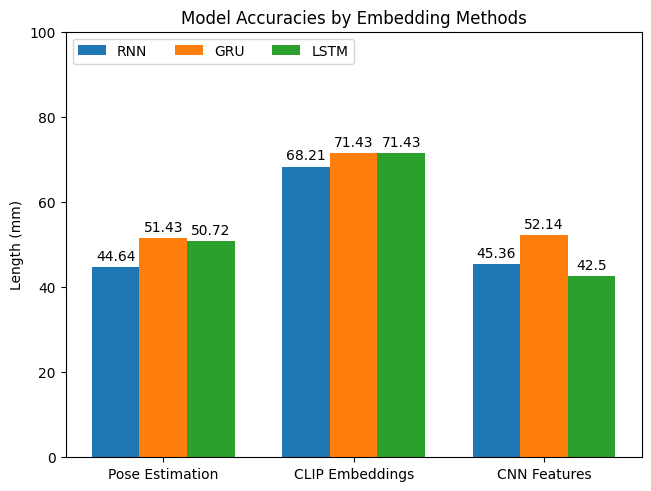

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Pose Estimation", "CLIP Embeddings", "CNN Features")
penguin_means = {
    'RNN': (44.64, 68.21, 45.36),
    'GRU': (51.43, 71.43, 52.14),
    'LSTM': (50.72, 71.43, 42.5),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Model Accuracies by Embedding Methods')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()